<a href="https://colab.research.google.com/github/davidofitaly/04_polynomial_regression_projects/blob/main/01_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import of libraries

In [4]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.set_printoptions(precision=4, suppress=True)

# Set the font scale for Seaborn plots
sns.set(font_scale=1.3)

# Print the version of the imported libraries for refernece
print(f'Pandas: {pd.__version__}')
print(f'Numpy: {np.__version__}')
print(f'Sklearn: {sklearn.__version__}')
print(f'Seaborn: {sns.__version__}')

Pandas: 2.1.4
Numpy: 1.26.4
Sklearn: 1.5.2
Seaborn: 0.13.1


###Data generation

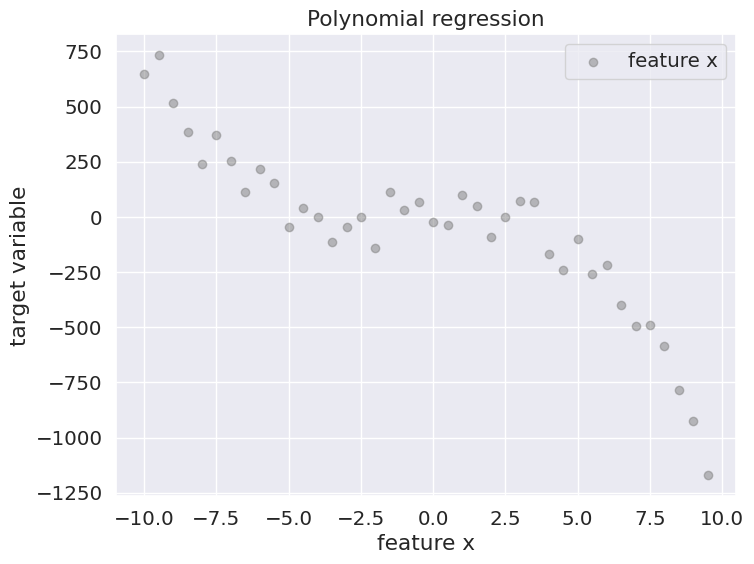

In [41]:
X = np.arange(-10, 10, 0.5)
noise = 80 * np.random.randn(len(X))
y = -X**3 - 2*X**2 + 3*X -2 + noise
X = X.reshape(40, 1)

plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X, y, label='feature x', color='grey', alpha=0.5)
plt.legend()
plt.show()

###Linear model of the first degree

In [42]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [61]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_lin_1 = regressor.predict(X_test)

In [58]:
intercept_1 = regressor.intercept_

intercept_1

-66.32635609687497

In [59]:
coef_1 = regressor.coef_[0]

coef_1

-58.92086740438796

####Linear model of the first degree - visualization

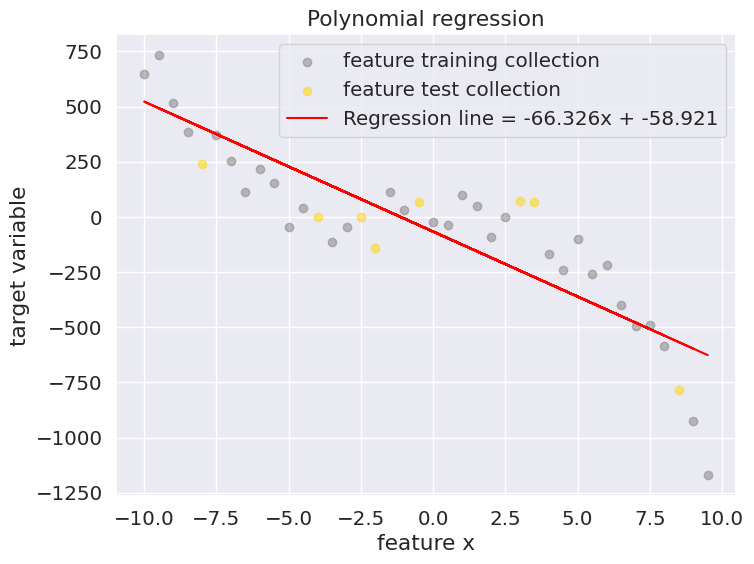

In [64]:
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label='Regression line = '  f"{intercept_1:.3f}x + {coef_1:.3f}")
plt.legend()
plt.show()

####Model-based prediction

In [67]:
# Generate predictions for the test set using the trained linear regression model
y_pred_1 = regressor.predict(X_test)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_1 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_1})
predictions_1.head()

,y_true,y_pred
0,69.044077,-36.865922
1,-139.751132,51.515379
2,-0.774003,80.975812
3,73.790181,-243.088958
4,242.383479,405.040583


In [68]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_1['error'] = predictions_1['y_true'] - predictions_1['y_pred']
predictions_1.head()

,y_true,y_pred,error
0,69.044077,-36.865922,105.910000
1,-139.751132,51.515379,-191.266511
2,-0.774003,80.975812,-81.749815
3,73.790181,-243.088958,316.879139
4,242.383479,405.040583,-162.657104


In [69]:
# Calculate the squared error by squaring the prediction errors
predictions_1['error_squared'] = predictions_1['error'] **2
predictions_1.head()

,y_true,y_pred,error,error_squared
0,69.044077,-36.865922,105.910000,11216.928012
1,-139.751132,51.515379,-191.266511,36582.878311
2,-0.774003,80.975812,-81.749815,6683.032256
3,73.790181,-243.088958,316.879139,100412.388751
4,242.383479,405.040583,-162.657104,26457.333624


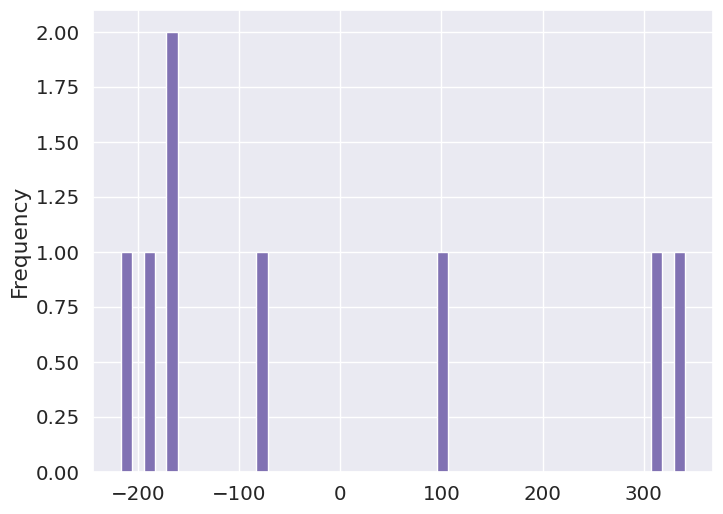

In [71]:
# Plot a histogram of the prediction errors to visualize their distribution
_ = predictions_1['error'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

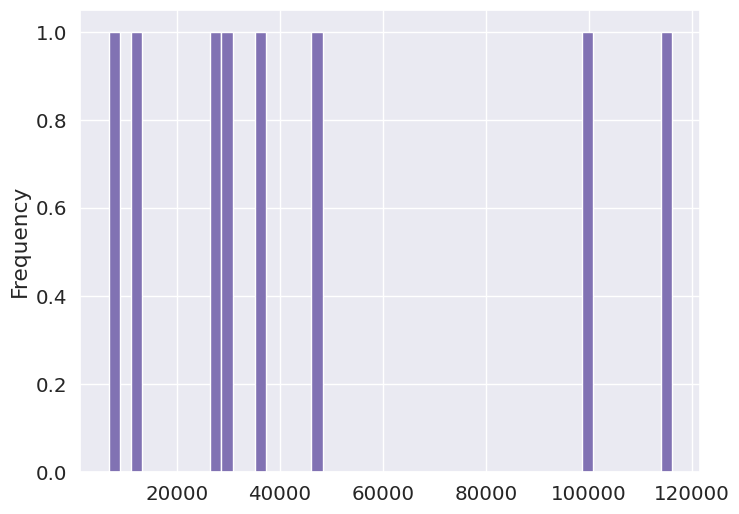

In [72]:
# Plot a histogram of the squared predictions errors to analyze their distribution
_ = predictions_1['error_squared'].plot(kind='hist', bins=50, figsize=(8,6), color='m')

####Linear model of the first degree  metrics

- Mean Absolute Error

In [75]:
# Calculate and return Mean Absolute Error (MAE) between the true and predicted values
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred_1)
print(f"The model makes an average error of {mean_absolute_error(y_test, y_pred_1):.3f}")

The model makes an average error of 198.404


- Mean Squared Error

In [77]:
# Calculate and return Mean Squared Error (MSE) between the true and predicted values
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_1)
print(f'The mean squared error of the model is: {mean_squared_error(y_test, y_pred_1):.3f}')

The mean squared error of the model is: 46726.317


- Root Mean Squared Error - RMSE

In [78]:
# Calculate the Root Mean Squared Error (RMSE) by takig the square root of the Mean Swuared Error (MSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
print(f'The Root Mean Squared Error (RMSE) of the model is: {rmse:.3f}')

The Root Mean Squared Error (RMSE) of the model is: 216.163


- Max Error

In [80]:
# Calculate the maximum error between the actual and predicted values
from sklearn.metrics import max_error

max_err= max_error(y_test, y_pred_1)
print(f'The maximum error of the model is: {max_err:.3f}')

The maximum error of the model is: 340.815


- R2 score - coefficient of determination

In [82]:
# Calculate the R^2 (coefficient of determination) score for the model predictions
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_1)
print(f'The R^2 score of the model is: {r2:.3f}')

The R^2 score of the model is: 0.450


###Linear model of the second degree

In [83]:
# Import train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split datasets into training and testing sets with 30% of the data allocated for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing collections
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (32, 1)
X_test shape: (8, 1)
y_train shape: (32,)
y_test shape: (8,)


In [110]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)


X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


In [90]:
X_train_poly[:10]

array([[ 1.  ,  9.5 , 90.25],
       [ 1.  , -7.  , 49.  ],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  , -5.5 , 30.25],
       [ 1.  , -3.5 , 12.25],
       [ 1.  ,  5.5 , 30.25],
       [ 1.  ,  7.  , 49.  ],
       [ 1.  , -6.  , 36.  ],
       [ 1.  , -1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ]])

In [91]:
X_test_poly[:10]

array([[ 1.  , -0.5 ,  0.25],
       [ 1.  , -2.  ,  4.  ],
       [ 1.  , -2.5 ,  6.25],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  , -8.  , 64.  ],
       [ 1.  , -4.  , 16.  ],
       [ 1.  ,  8.5 , 72.25],
       [ 1.  ,  3.5 , 12.25]])

In [96]:
regressor_2 = LinearRegression()
regressor_2.fit(X_train_poly, y_train)

LinearRegression()

In [100]:
intercept_2 = regressor_2.intercept_

intercept_2

-4.149952077608226

In [102]:
coef_2 = regressor_2.coef_

coef_2

array([  0.   , -60.125,  -1.737])

####Linear model of the second degree - visualization

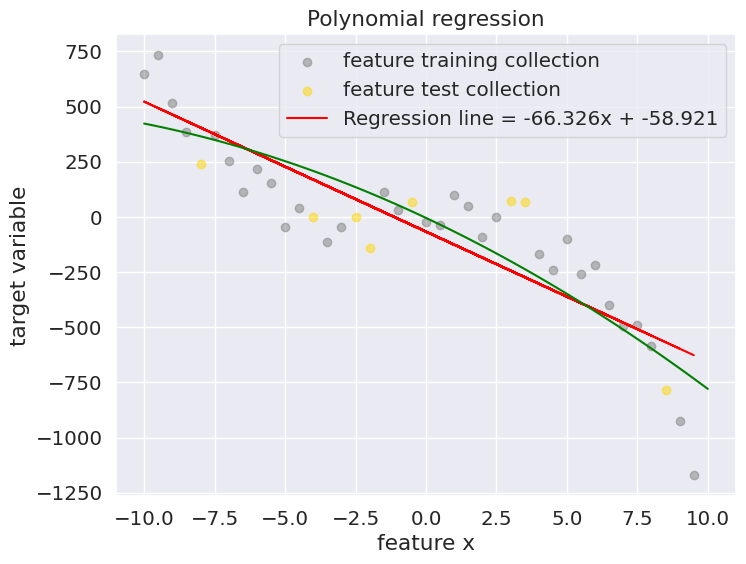

In [122]:
X_range = np.linspace(-10, 10, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = regressor_2.predict(X_range_poly)


y_pred_2 = regressor_2.predict(X_test_poly)
plt.figure(figsize=(8,6))
plt.title('Polynomial regression')
plt.xlabel('feature x')
plt.ylabel('target variable')
plt.scatter(X_train, y_train, label='feature training collection', color='grey', alpha=0.5)
plt.scatter(X_test, y_test, label='feature test collection', color='gold', alpha=0.5)
plt.plot(X_train, intercept_1 + coef_1 * X_train, color='red', label='Regression line = '  f"{intercept_1:.3f}x + {coef_1:.3f}")
plt.plot(X_range, y_range_pred, color='green')
plt.legend()
plt.show()

####Model-based prediction

In [123]:
# Generate predictions for the test set using the trained linear regression model
y_pred_2 = regressor_2.predict(X_test_poly)

# Create a DataFrame to compare the true values (y_yest) with the predicted values (y_pred_1)
predictions_2 = pd.DataFrame(data= {'y_true': y_test, 'y_pred': y_pred_2})
predictions_2.head()

,y_true,y_pred
0,69.044077,25.478285
1,-139.751132,109.152020
2,-0.774003,135.306274
3,73.790181,-200.157790
4,242.383479,365.682324


In [124]:
# Calculate the prediction error as the difference between the true and predicted values
predictions_2['error'] = predictions_2['y_true'] - predictions_2['y_pred']
predictions_2.head()

,y_true,y_pred,error
0,69.044077,25.478285,43.565792
1,-139.751132,109.152020,-248.903153
2,-0.774003,135.306274,-136.080276
3,73.790181,-200.157790,273.947971
4,242.383479,365.682324,-123.298845
